Name: Miryam Strautkalns

Student ID: 012561315

Null Hypothesis

**Hypothesis:**

**Of the individuals with age 30 years old and older:**

Having a degree will give an individual skills that will in turn result in them producing products that are of higher value in the economic market. The GDP of graduates will be higher than those who dropped out.

H:
Graduates will have a significantly different distribution, and higher median and mean.

H0:
Graduates will have approximately the same distribution as Dropouts, with similar median and mean.

H1(alternative):
Graduates will have a significantly different distribution, and lower median and mean.

**Of those that did not receive scholarships:**

H:
Mean unemployment rate is higher.

H0:
There will be no difference in means.

H1(alternative:
Mean unemployment rate is lower.



In the code below:

Creating Pandas DataFrames:

1: Individuals who received scholarships

2: Individuals who are 30 years and older

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
import missingno as msno
import scipy.stats as stats

datapd = pd.read_csv('/content/dataset.csv')
# Scholarships
yes_no_key = {1:'yes', 0:'no'}
datapd = datapd.replace({'Scholarship holder': yes_no_key})
datapd_scholar_yes = datapd.where(datapd['Scholarship holder'] == 'yes').dropna().reset_index()
datapd_scholar_no = datapd.where(datapd['Scholarship holder'] == 'no').dropna().reset_index()

# 30 and older
datapd_30older = datapd.where(datapd['Age at enrollment'] >= 30).dropna().reset_index()



# **GDP of Graduates and Drop Outs, 30 yrs and older:**

In [ ]:
print('Individuals who are 30 years and older, Number of Data Entries:')
print(len(datapd_30older.index), '\n')

Individuals who are 30 years and older, Number of Data Entries:
711 



In [ ]:
datapd_30older.head()

,index,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,4,2.0,12.0,1.0,3.0,0.0,1.0,1.0,22.0,28.0,...,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79,Graduate
1,5,2.0,12.0,1.0,17.0,0.0,12.0,1.0,22.0,27.0,...,0.0,5.0,17.0,5.0,11.500000,5.0,16.2,0.3,-0.92,Graduate
2,34,1.0,1.0,1.0,17.0,0.0,1.0,1.0,2.0,27.0,...,0.0,5.0,9.0,5.0,13.428571,0.0,13.9,-0.3,0.79,Graduate
3,35,1.0,12.0,1.0,1.0,1.0,1.0,1.0,23.0,27.0,...,0.0,7.0,7.0,1.0,10.000000,0.0,8.9,1.4,3.51,Dropout
4,36,1.0,12.0,1.0,7.0,1.0,8.0,1.0,19.0,27.0,...,0.0,5.0,0.0,0.0,0.000000,0.0,7.6,2.6,0.32,Dropout


In [ ]:
print("\nNumber of Duplicates in Data Set:")
print(len(datapd_30older[datapd_30older.duplicated()].index))

discrete_vars = ['Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']
datapd_30older[discrete_vars].describe(include='all')


Number of Duplicates in Data Set:
0


,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,38.285513,1.646976,6.888889,9.225035,4.371308,9.241538,0.199719,1.247539,6.565401,8.248945,3.807314,8.576453,0.225035,11.686779,1.280028,-0.325091
std,6.927902,3.519041,3.096618,5.088235,4.073268,5.629522,0.847232,2.809549,2.445090,4.480778,3.618536,5.970095,0.917739,2.811635,1.453367,2.249821
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,33.000000,0.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,0.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,37.000000,0.000000,6.000000,9.000000,4.000000,11.705714,0.000000,0.000000,6.000000,8.000000,4.000000,11.500000,0.000000,11.100000,1.400000,0.320000
75%,43.000000,1.000000,7.000000,12.000000,6.000000,13.000000,0.000000,1.000000,7.000000,11.000000,6.000000,12.833333,0.000000,13.900000,2.600000,1.740000
max,70.000000,20.000000,21.000000,31.000000,21.000000,18.875000,8.000000,19.000000,19.000000,26.000000,19.000000,17.692308,8.000000,16.200000,3.700000,3.510000


**Description, Graduates:**

In [ ]:
print('median\t', datapd_30older.where(datapd_30older['Target'] == 'Graduate')['GDP'].median())

datapd_30older.where(datapd_30older['Target'] == 'Graduate')['GDP'].describe(include='all')


median	 0.32


count    236.000000
mean      -0.257542
std        2.260168
min       -4.060000
25%       -1.700000
50%        0.320000
75%        1.740000
max        3.510000
Name: GDP, dtype: float64

**Description, Dropouts:**

In [ ]:
print('median\t', datapd_30older.where(datapd_30older['Target'] == 'Dropout')['GDP'].median())
datapd_30older.where(datapd_30older['Target'] == 'Dropout')['GDP'].describe(include='all')

median	 0.32


count    385.000000
mean      -0.389896
std        2.229267
min       -4.060000
25%       -1.700000
50%        0.320000
75%        1.740000
max        3.510000
Name: GDP, dtype: float64

**Visualizations:**

Text(0.5, 1.0, 'Graduates, 30 yrs and older: GDP')

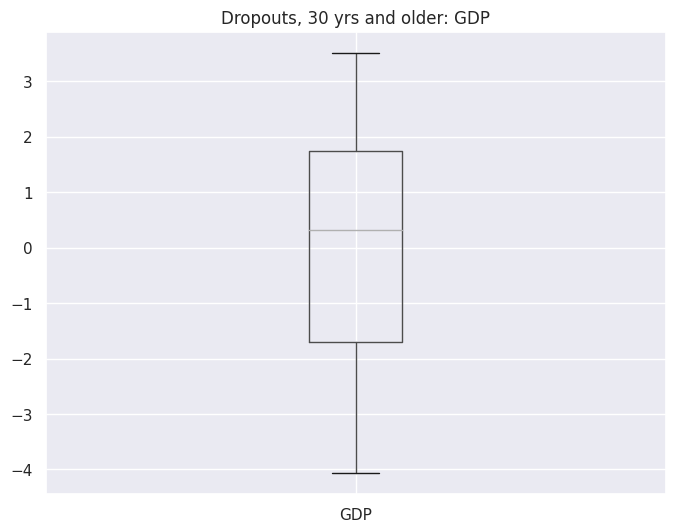

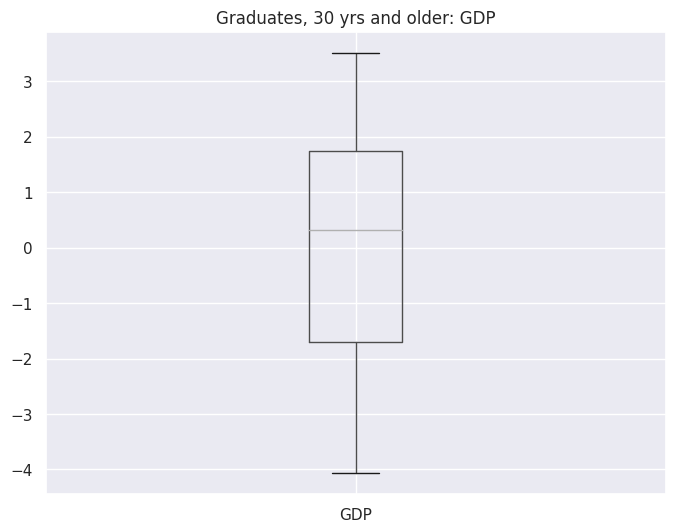

In [ ]:
boxplotdf = datapd_30older.where(datapd_30older['Target'] == 'Dropout')
boxplotdf1 = datapd_30older.where(datapd_30older['Target'] == 'Graduate')
# boxplotdf = boxplotdf['GDP']
# boxplotdf.boxplot(rot=90)
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
boxplotdf.boxplot(column='GDP', ax=ax)
ax.set_title('Dropouts, 30 yrs and older: GDP')

fig = plt.figure(figsize=(8,6))
ax = fig.gca()
boxplotdf1.boxplot(column='GDP', ax=ax)
ax.set_title('Graduates, 30 yrs and older: GDP')

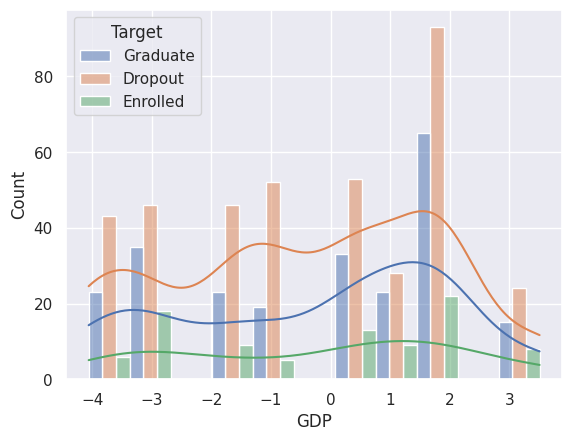

In [ ]:

sns.histplot(data=datapd_30older, x="GDP", hue = "Target", kde=True, multiple="dodge").tick_params(axis='x')

**Of the individuals with age 30 years old and older:**

Having a degree will give an individual skills that will in turn result in them producing products that are of higher value in the economic market. The GDP of graduates will be higher than those who dropped out.

H:
Graduates will have a significantly different distribution, and higher median and mean.

H0:
Graduates will have approximately the same distribution as Dropouts, with similar median and mean.


**Analysis:**

I thought that there would be a signicant difference in the GDP for Graduates and Dropouts, but the data is almost the same for both sets. I thought that a degree would  increase the product value for each individual's impact on the market. Both have a median of 0.32, Graduates have a mean of -0.258 and Dropouts a mean of -0.390, but the quartile values and whiskers are the same for both. The bar graph confirms that the best fit lines are similar and the only difference is the count. Thus, the null hypothesis is proven true.

# **Inflation rate and Scholarship holders:**

In [ ]:
print('Individuals who received scholarships, Number of Data Entries:')
print(len(datapd_scholar_yes.index), '\n')
datapd_scholar_yes.head()

Individuals who received scholarships, Number of Data Entries:
1099 



,index,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,6,1.0,1.0,1.0,12.0,1.0,1.0,1.0,13.0,28.0,...,0.0,8.0,8.0,8.0,14.345000,0.0,15.5,2.8,-4.06,Graduate
1,8,1.0,1.0,3.0,10.0,1.0,1.0,15.0,1.0,1.0,...,0.0,6.0,7.0,6.0,14.142857,0.0,16.2,0.3,-0.92,Graduate
2,11,1.0,1.0,1.0,12.0,1.0,1.0,1.0,13.0,28.0,...,0.0,8.0,8.0,7.0,13.214286,0.0,12.7,3.7,-1.70,Graduate
3,13,1.0,17.0,1.0,11.0,1.0,16.0,1.0,1.0,1.0,...,0.0,6.0,8.0,5.0,11.000000,0.0,8.9,1.4,3.51,Graduate
4,14,1.0,1.0,1.0,6.0,1.0,1.0,1.0,23.0,27.0,...,0.0,5.0,5.0,5.0,12.000000,0.0,10.8,1.4,1.74,Graduate


In [ ]:
print("\nNumber of Duplicates in Data Set:")
print(len(datapd_scholar_yes[datapd_scholar_yes.duplicated()].index), '\n')
print('Description, \nInflation rate of Scholarship holders:\n')
print('median\t', datapd_scholar_yes['Inflation rate'].median())
datapd_scholar_yes['Inflation rate'].describe(include='all')


Number of Duplicates in Data Set:
0 

Description, 
Inflation rate of Scholarship holders:

median	 0.6


count    1099.000000
mean        1.153230
std         1.366219
min        -0.800000
25%         0.300000
50%         0.600000
75%         2.600000
max         3.700000
Name: Inflation rate, dtype: float64

In [ ]:
print('Description, \nInflation rate of non Scholarship holders:\n')
print('median\t', datapd_scholar_no['Inflation rate'].median())
datapd_scholar_no['Inflation rate'].describe(include='all')

Description, 
Inflation rate of non Scholarship holders:

median	 1.4


count    3325.000000
mean        1.252752
std         1.387436
min        -0.800000
25%         0.300000
50%         1.400000
75%         2.600000
max         3.700000
Name: Inflation rate, dtype: float64

**Visualizations:**

**Boxplots:**

Text(0.5, 1.0, 'Scholarship holder, No: Inflation rate')

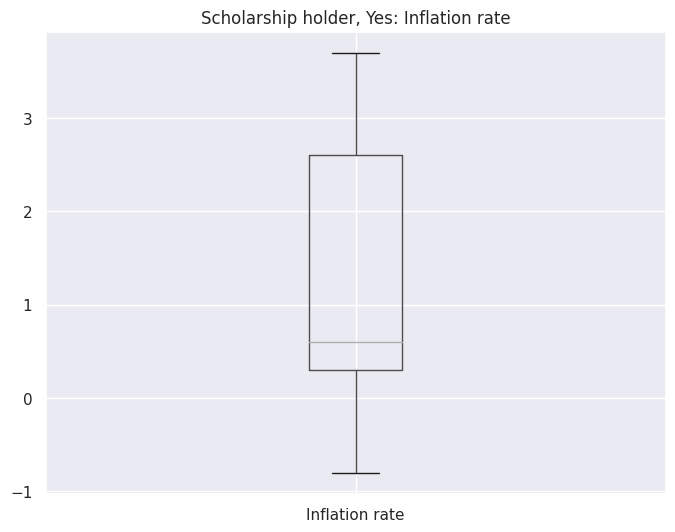

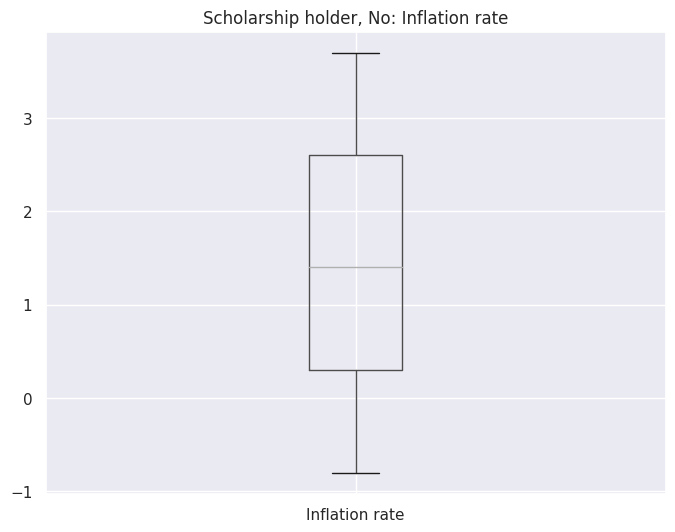

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
datapd_scholar_yes.boxplot(column='Inflation rate', ax=ax)
ax.set_title('Scholarship holder, Yes: Inflation rate')

fig = plt.figure(figsize=(8,6))
ax = fig.gca()
datapd_scholar_no.boxplot(column='Inflation rate', ax=ax)
ax.set_title('Scholarship holder, No: Inflation rate')

**QQ Plots: Inflation Rate**


Scholarship holder, No


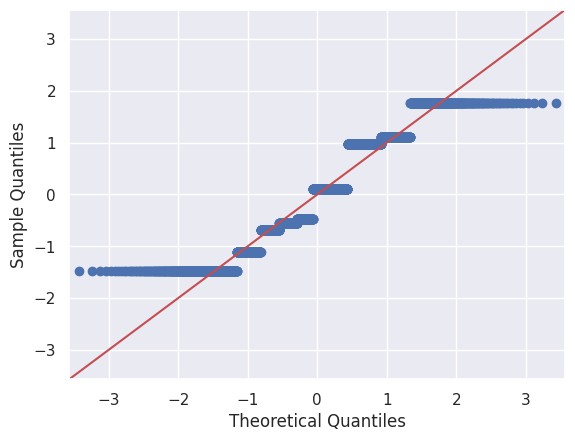

In [ ]:
print('Scholarship holder, No')
sm.qqplot(datapd_scholar_no['Inflation rate'],line='45',fit=True,dist=stats.norm)
plt.show()

Scholarship holder, Yes


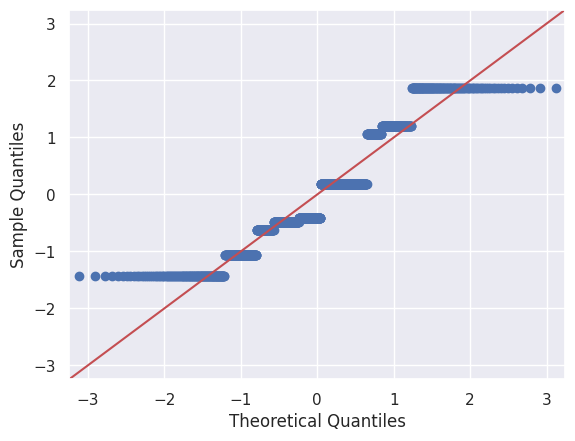

In [ ]:
print('Scholarship holder, Yes')
sm.qqplot(datapd_scholar_yes['Inflation rate'],line='45',fit=True,dist=stats.norm)
plt.show()

**Bar graph:**

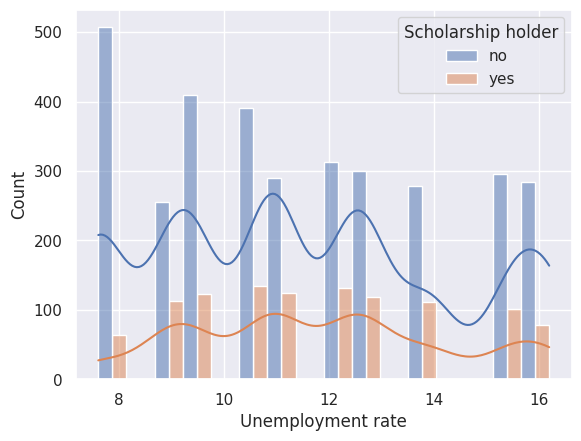

In [ ]:

sns.histplot(data=datapd, x="Unemployment rate", hue = "Scholarship holder", kde=True, multiple="dodge").tick_params(axis='x')

**Of those that did not receive scholarships:**

H:
Mean unemployment rate is higher.

H0:
There is no difference in means.

H1(alternative):
Mean unemployment rate is lower.

**Analysis:**

The median values of NSH (Non Scholarship holders) and SH (Scholarship holders) are 1.4 and 0.6. These values already show that the SH individuals seem to have a lower inflation rates, this is confirmed by the description values. The mean of NSH is 1.253 and SH is 1.153, the average of the SH is lower than NSH. Thus, the hypothesis is proven true.

To understand the data further the distributions were shown in boxplot and qq plots. The initial impressions with boxplots were that the NSH have an approximately normal distributed Inflation rate. The SH have a positively skewed distribution based on the median's placement low on the box. To confirm observations, the data is then analyzed in qq plots. Despite the positively skewed appearance of the data for SH in the boxplots the data shows a normal distribution in the qq plot. The spikes in data at the extremes would explain the median's placement in the boxplot. The qq plot for the NSH is normally distributed with spikes, more so on the extremes, but they follow the normal line.
